In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from pygments import highlight
import seaborn as sns

# Read the CSV file
df = pd.read_csv(r"C:\Users\Surface Laptop 3\OneDrive\Documents\DataScience\data.csv")
print(df.head()) 

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


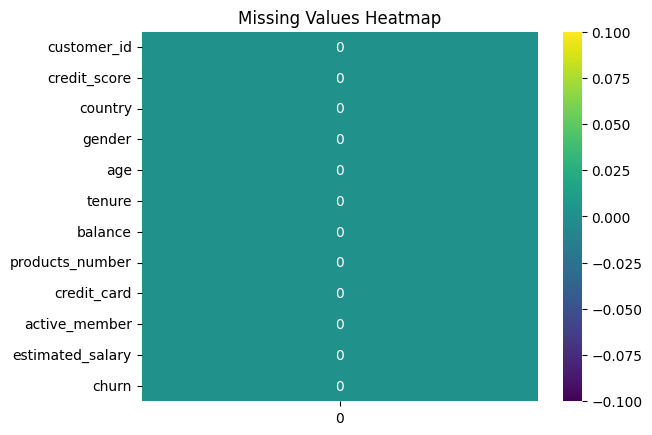

In [123]:
# Check for missing values
missing_values = df.isnull().sum() # 0 missing values in each column
sns.heatmap(missing_values.to_frame(), annot=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [124]:
duplicated_valus = df.duplicated().sum() # 0 duplicate rows
print("Duplicated values: ",duplicated_valus)

Duplicated values:  0


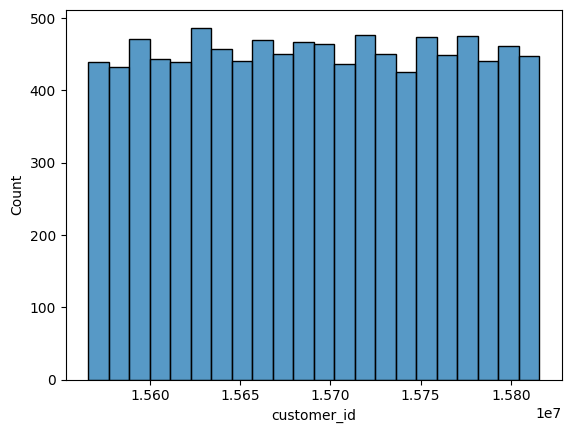

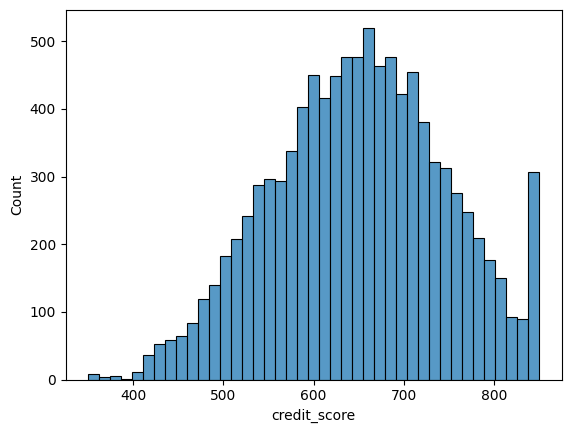

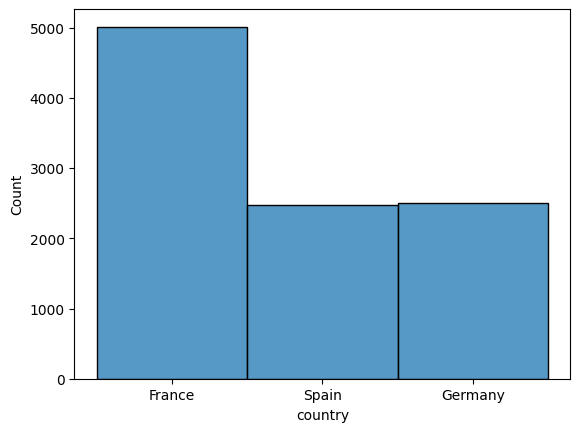

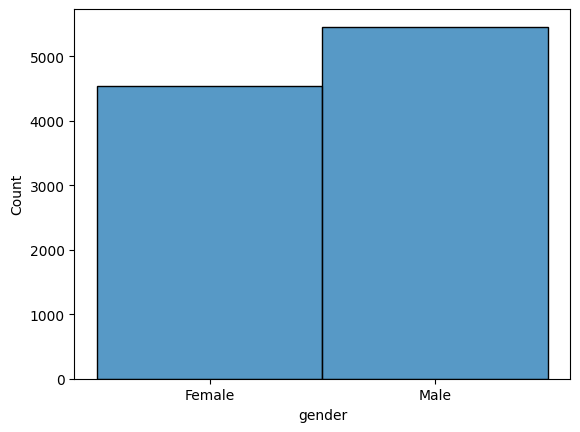

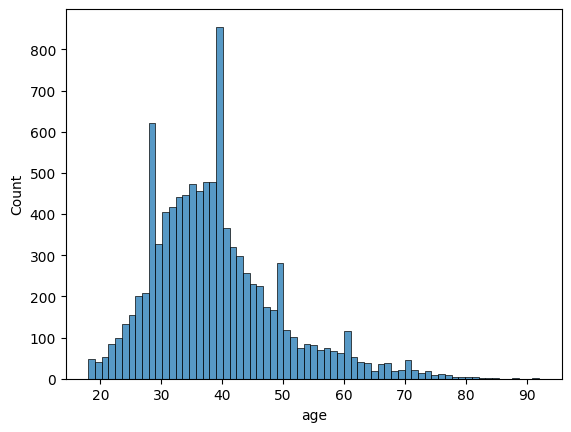

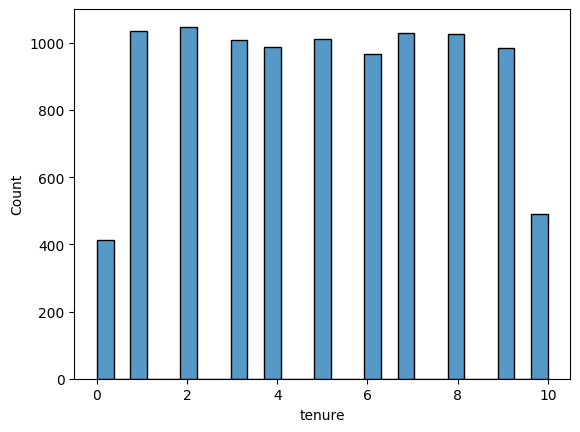

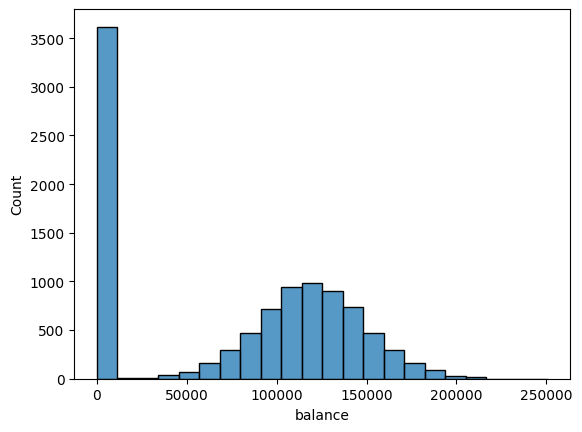

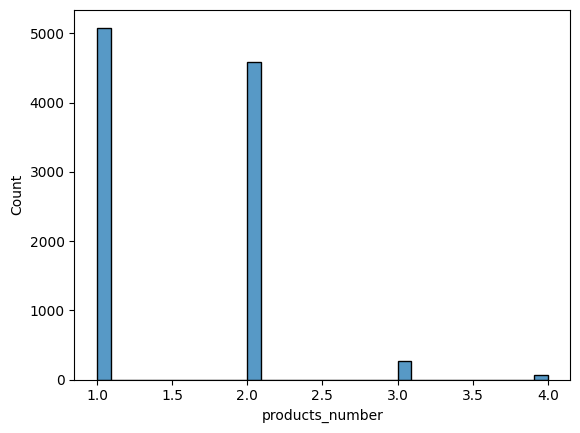

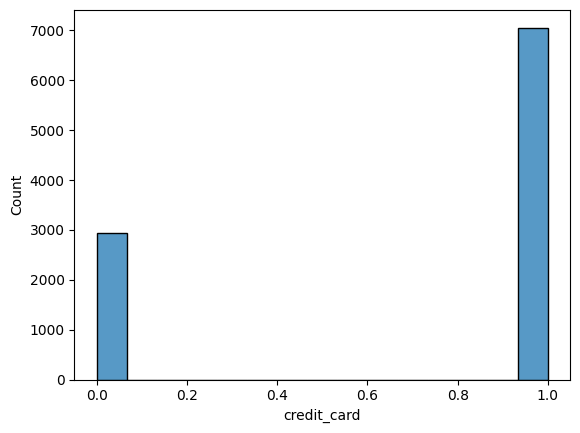

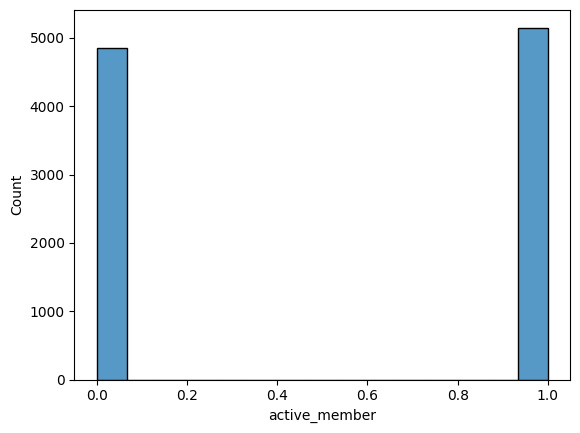

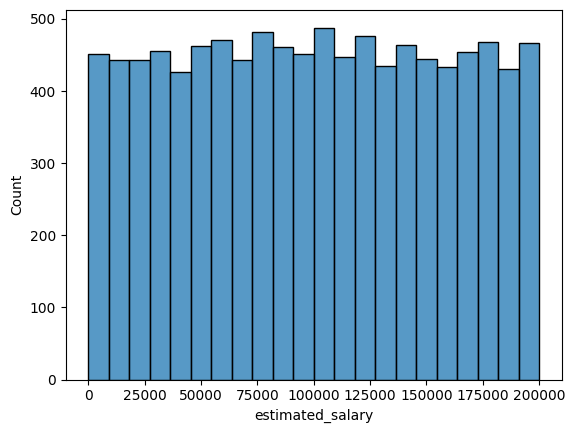

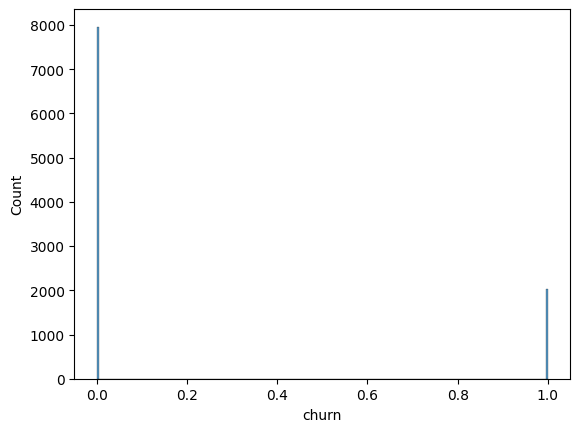

In [125]:
for i in df:
    sns.histplot(data=df,x=i)
    plt.show()

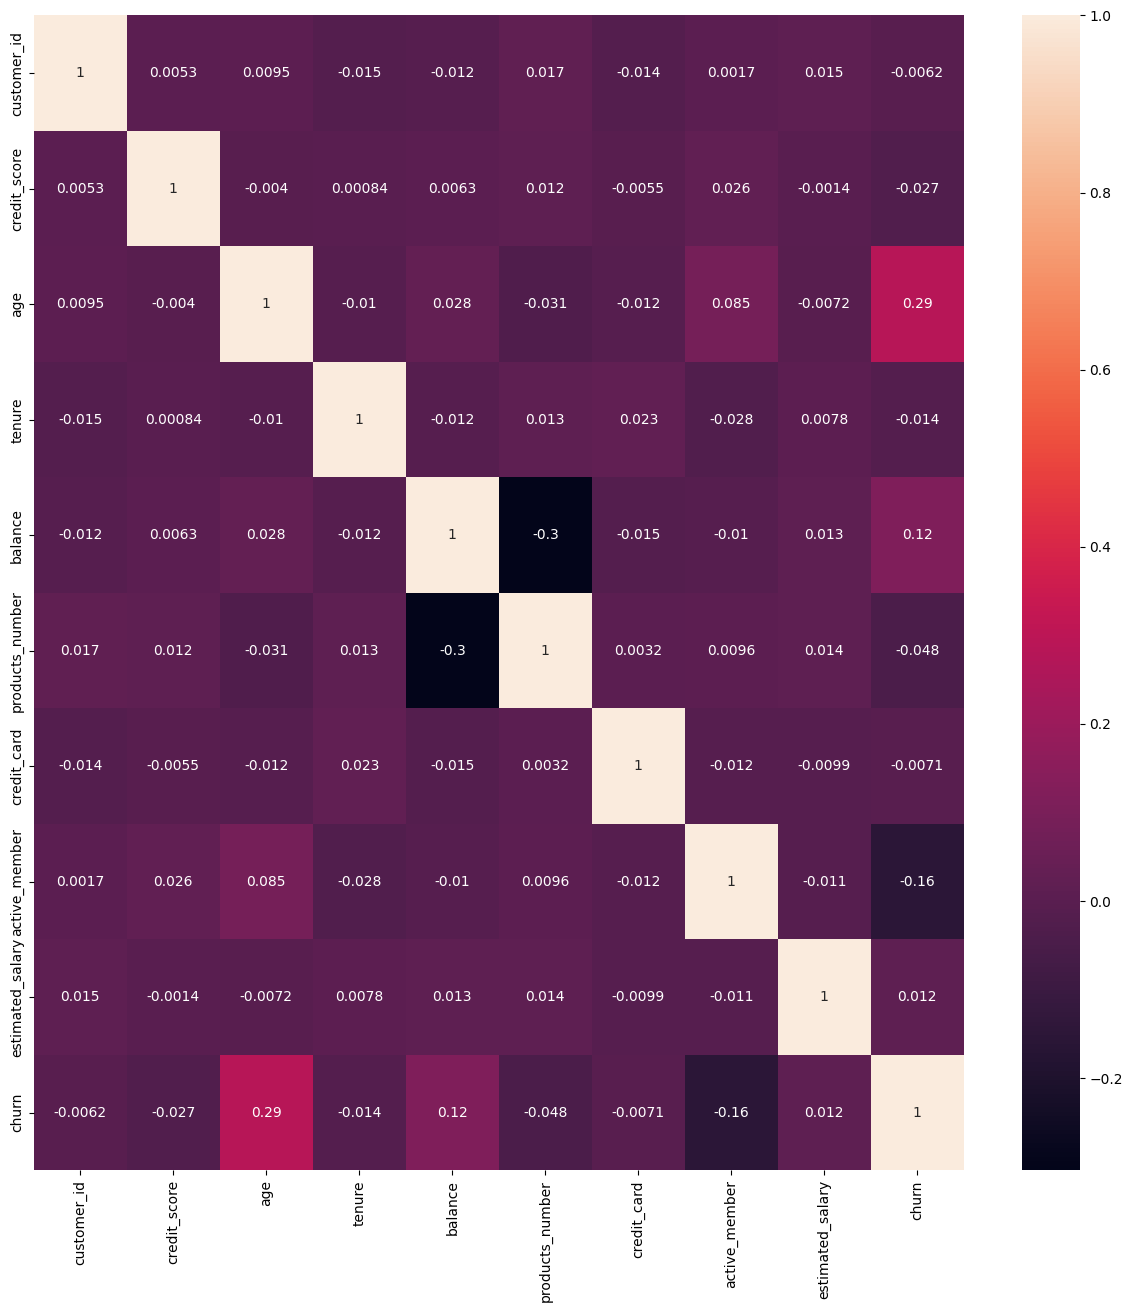

In [126]:
correlation = df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)
plt.show()

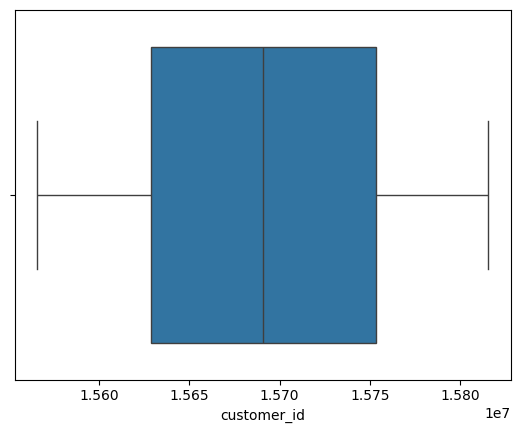

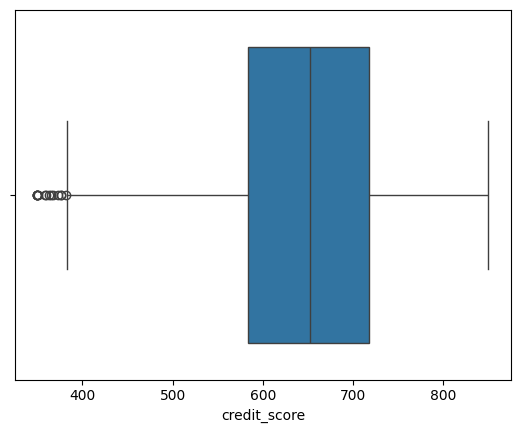

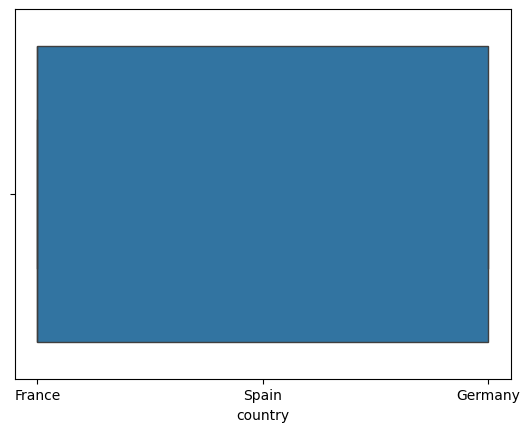

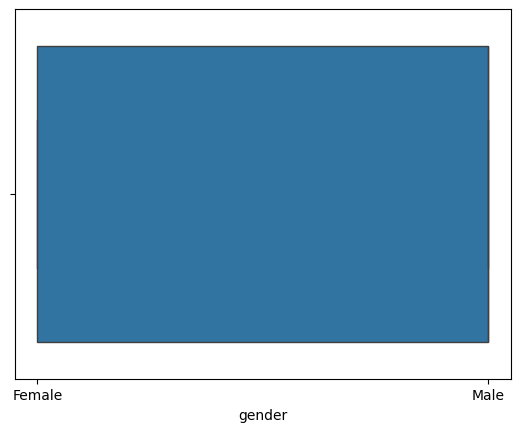

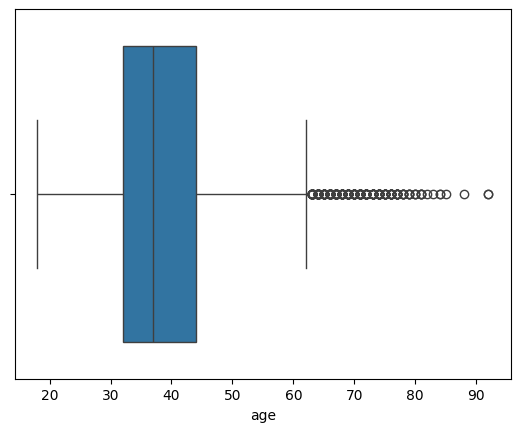

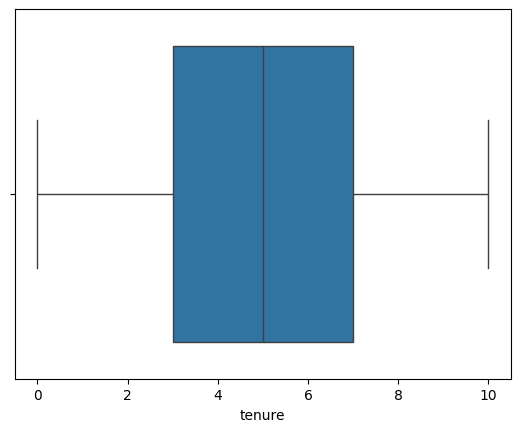

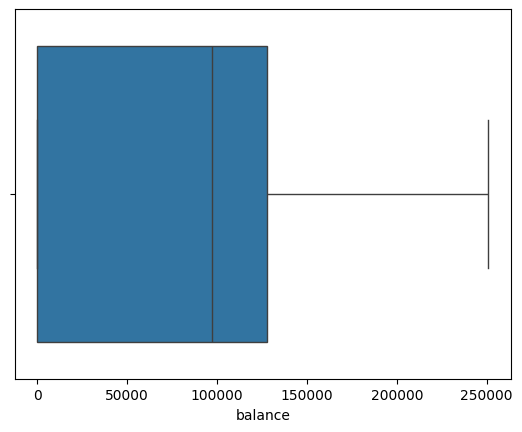

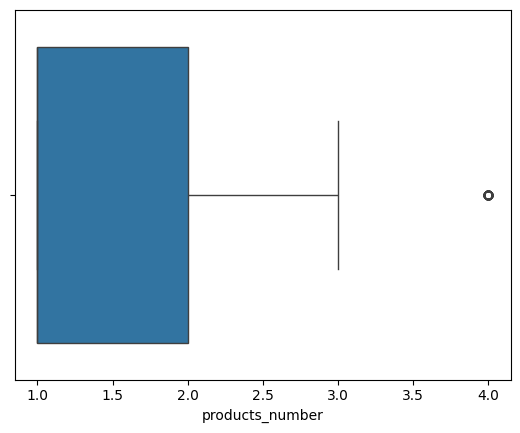

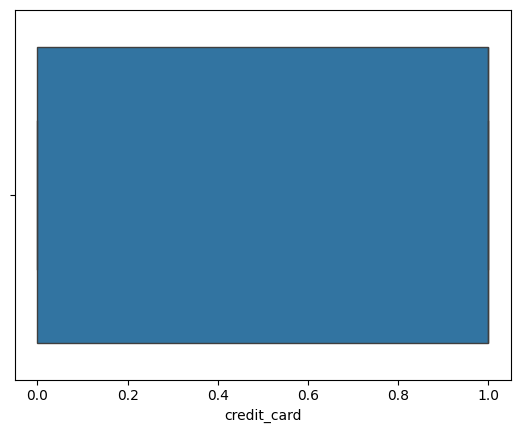

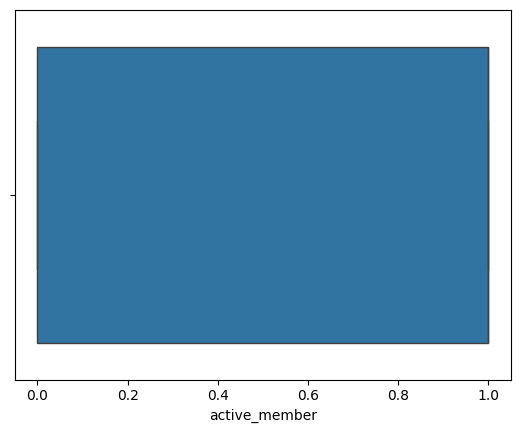

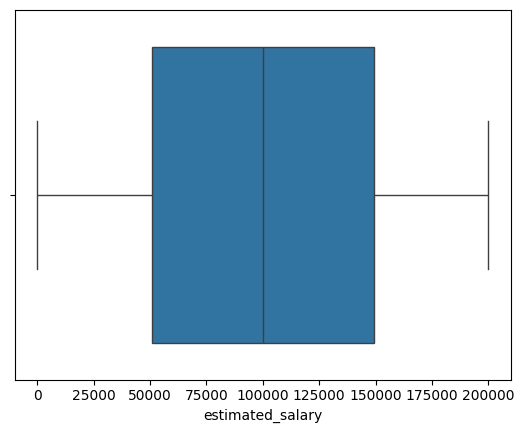

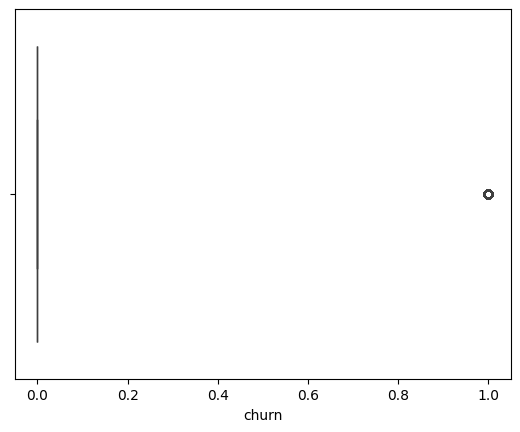

In [127]:
for y in df:
    sns.boxplot(data=df,x=y)
    plt.show()

In [128]:
#Outliers
#drop customer id 
df =df.drop("customer_id", axis=1)
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


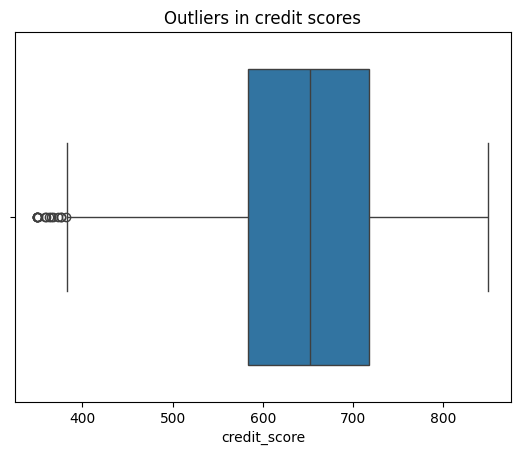

In [129]:
bp=sns.boxplot(x=df["credit_score"])
plt.title("Outliers in credit scores")
plt.show()

In [130]:
# Create credit score categories
bins = [0, 350, 500, 650, 800, 850]
labels = ['Very High Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Very Low Risk']
df["credit_category"] = pd.cut(df["credit_score"], bins=bins, labels=labels)
print(df.head())


   credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn credit_category  
0            1              1         101348.88      1     Medium Risk  
1            0              1         112542.58      0     Medium Risk  
2            1              0         113931.57      1     Medium Risk  
3            0              0          93826.63      0        Low Risk  
4            1              1          79084.10      0   Very Low Risk  


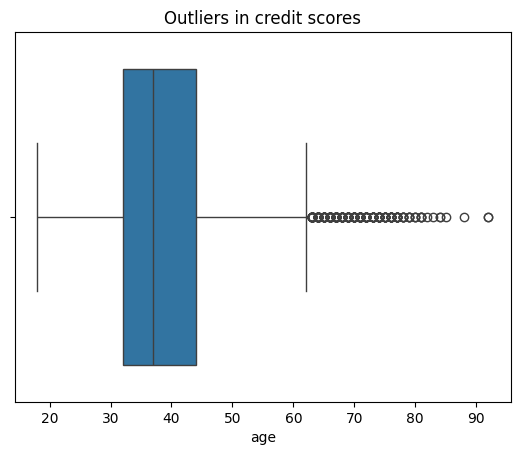

In [131]:
bp=sns.boxplot(x=df["age"])
plt.title("Outliers in credit scores")
plt.show()

In [132]:
#IQR method
Q1 = df["age"].quantile(.25)
Q2 = df["age"].quantile(.5)
Q3 = df["age"].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


outliers = (df["age"] < lower_bound) |(df["age"] > upper_bound)
print(f"Number of outliers: {outliers.sum()}")


Number of outliers: 359


In [133]:
bins = [17, 25, 65, 92]  
labels = ['Young', 'Working Age', 'Retired']
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
print("young ",(df["age_group"] == 'Young').value_counts())
print("Working Age ",(df["age_group"] == 'Working Age').value_counts())
print("Retired ",(df["age_group"] == 'Retired').value_counts())
df.head()

young  age_group
False    9389
True      611
Name: count, dtype: int64
Working Age  age_group
True     9125
False     875
Name: count, dtype: int64
Retired  age_group
False    9736
True      264
Name: count, dtype: int64


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_category,age_group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Medium Risk,Working Age
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Medium Risk,Working Age
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Medium Risk,Working Age
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Low Risk,Working Age
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Very Low Risk,Working Age


In [134]:
#Feature engineering example
avrage_salary = df["estimated_salary"].mean()
avrage_balance = df["balance"].mean()

df["IsHighValueCustomer"] = 0
df.loc[(df["estimated_salary"] > avrage_salary) & (df["balance"] > avrage_balance), "IsHighValueCustomer"] = 1
print(df["IsHighValueCustomer"].value_counts())#2996 high value customers

df["IsActiveWithBalance"] = 0
df.loc[(df["balance"] > 0) & (df["active_member"] == 1), "IsActiveWithBalance"] = 1
print(df["IsActiveWithBalance"].value_counts()) # 3278 active customers with balance

df["IsActiveWithoutBalance"] = 0
df.loc[(df["balance"] == 0) & (df["active_member"] == 1), "IsActiveWithoutBalance"] = 1
print(df["IsActiveWithoutBalance"].value_counts()) # 1873 active without balance customers

df["IsInactiveWithBalance"] = 0
df.loc[(df["balance"] > 0) & (df["active_member"] == 0), "IsInactiveWithBalance"] = 1
print(df["IsInactiveWithBalance"].value_counts() )#3105 inactive with balance customers

df["IsInactiveWithoutBalance"] = 0
df.loc[(df["balance"] == 0) & (df["active_member"] == 0), "IsInactiveWithoutBalance"] = 1
print(df["IsInactiveWithoutBalance"].value_counts())

IsHighValueCustomer
0    7004
1    2996
Name: count, dtype: int64
IsActiveWithBalance
0    6722
1    3278
Name: count, dtype: int64
IsActiveWithoutBalance
0    8127
1    1873
Name: count, dtype: int64
IsInactiveWithBalance
0    6895
1    3105
Name: count, dtype: int64
IsInactiveWithoutBalance
0    8256
1    1744
Name: count, dtype: int64


In [135]:
#country became bool
df = pd.get_dummies(df, columns=['country'], prefix='is')

# Convert True/False to 1/0 for country columns
bool_cols = ['is_France', 'is_Germany', 'is_Spain']
df[bool_cols] = df[bool_cols].astype(int)
print(df.head())

   credit_score  gender  age  tenure    balance  products_number  credit_card  \
0           619  Female   42       2       0.00                1            1   
1           608  Female   41       1   83807.86                1            0   
2           502  Female   42       8  159660.80                3            1   
3           699  Female   39       1       0.00                2            0   
4           850  Female   43       2  125510.82                1            1   

   active_member  estimated_salary  churn credit_category    age_group  \
0              1         101348.88      1     Medium Risk  Working Age   
1              1         112542.58      0     Medium Risk  Working Age   
2              0         113931.57      1     Medium Risk  Working Age   
3              0          93826.63      0        Low Risk  Working Age   
4              1          79084.10      0   Very Low Risk  Working Age   

   IsHighValueCustomer  IsActiveWithBalance  IsActiveWithoutBalance 

In [136]:
#categorial to numerical encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
catagorical_features = df["gender"].squeeze()
df["gender"]= label_encoder.fit_transform(catagorical_features)
print(df.head(1))

   credit_score  gender  age  tenure  balance  products_number  credit_card  \
0           619       0   42       2      0.0                1            1   

   active_member  estimated_salary  churn credit_category    age_group  \
0              1         101348.88      1     Medium Risk  Working Age   

   IsHighValueCustomer  IsActiveWithBalance  IsActiveWithoutBalance  \
0                    0                    0                       1   

   IsInactiveWithBalance  IsInactiveWithoutBalance  is_France  is_Germany  \
0                      0                         0          1           0   

   is_Spain  
0         0  


In [137]:
# One-hot encode and convert to int in one step
df = pd.get_dummies(df, columns=['credit_category', 'age_group'], drop_first=True , dtype=int)
df.tail(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,...,IsInactiveWithoutBalance,is_France,is_Germany,is_Spain,credit_category_High Risk,credit_category_Medium Risk,credit_category_Low Risk,credit_category_Very Low Risk,age_group_Working Age,age_group_Retired
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,...,0,0,1,0,0,0,1,0,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,...,0,1,0,0,0,0,1,0,1,0


In [138]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(columns=["churn"],axis=1)
y = df["churn"]
X_scaled = scaler.fit_transform(x)

chi_scores = chi2(X_scaled,y)


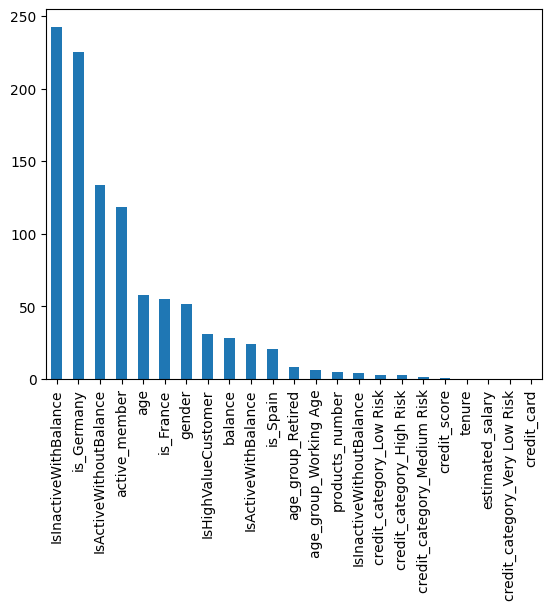

In [139]:
chi_values =pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()
plt.show()

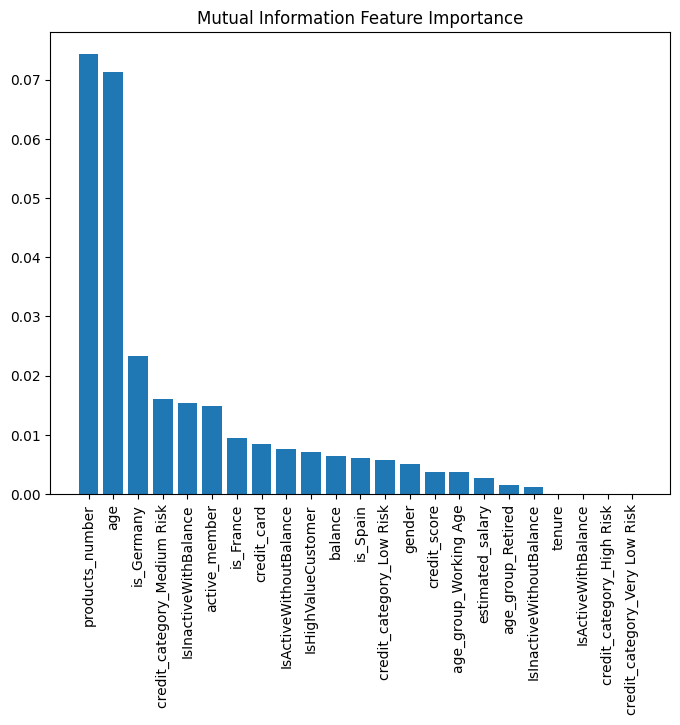

In [140]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(x,y,discrete_features='auto')
mi_df = pd.DataFrame({'df': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
plt.figure(figsize=(8,6))
plt.bar(mi_df['df'], mi_df['MI Score'])
plt.xticks(rotation=90)
plt.title("Mutual Information Feature Importance")
plt.show()

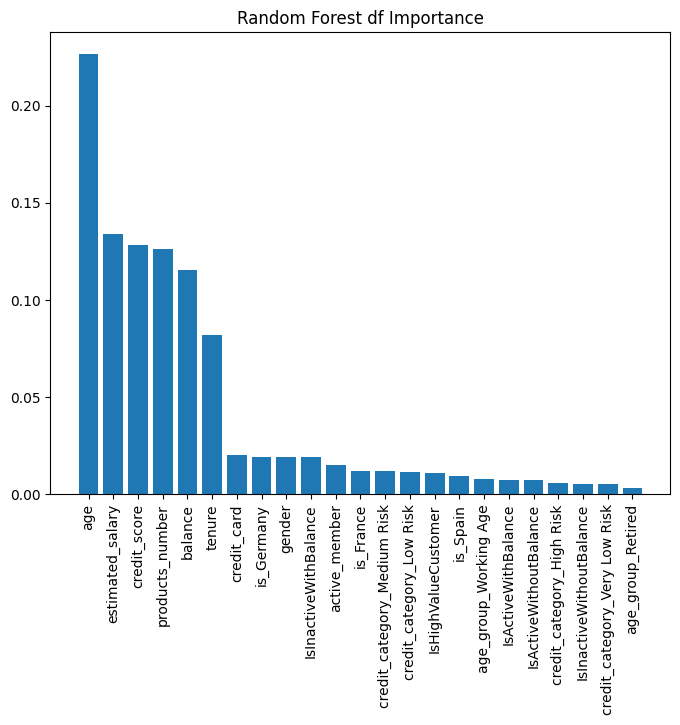

In [141]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("churn", axis=1)
y = df["churn"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
rf_df = pd.DataFrame({
    'df': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(8,6))
plt.bar(rf_df['df'], rf_df['Importance'])
plt.xticks(rotation=90)
plt.title("Random Forest df Importance")
plt.show()

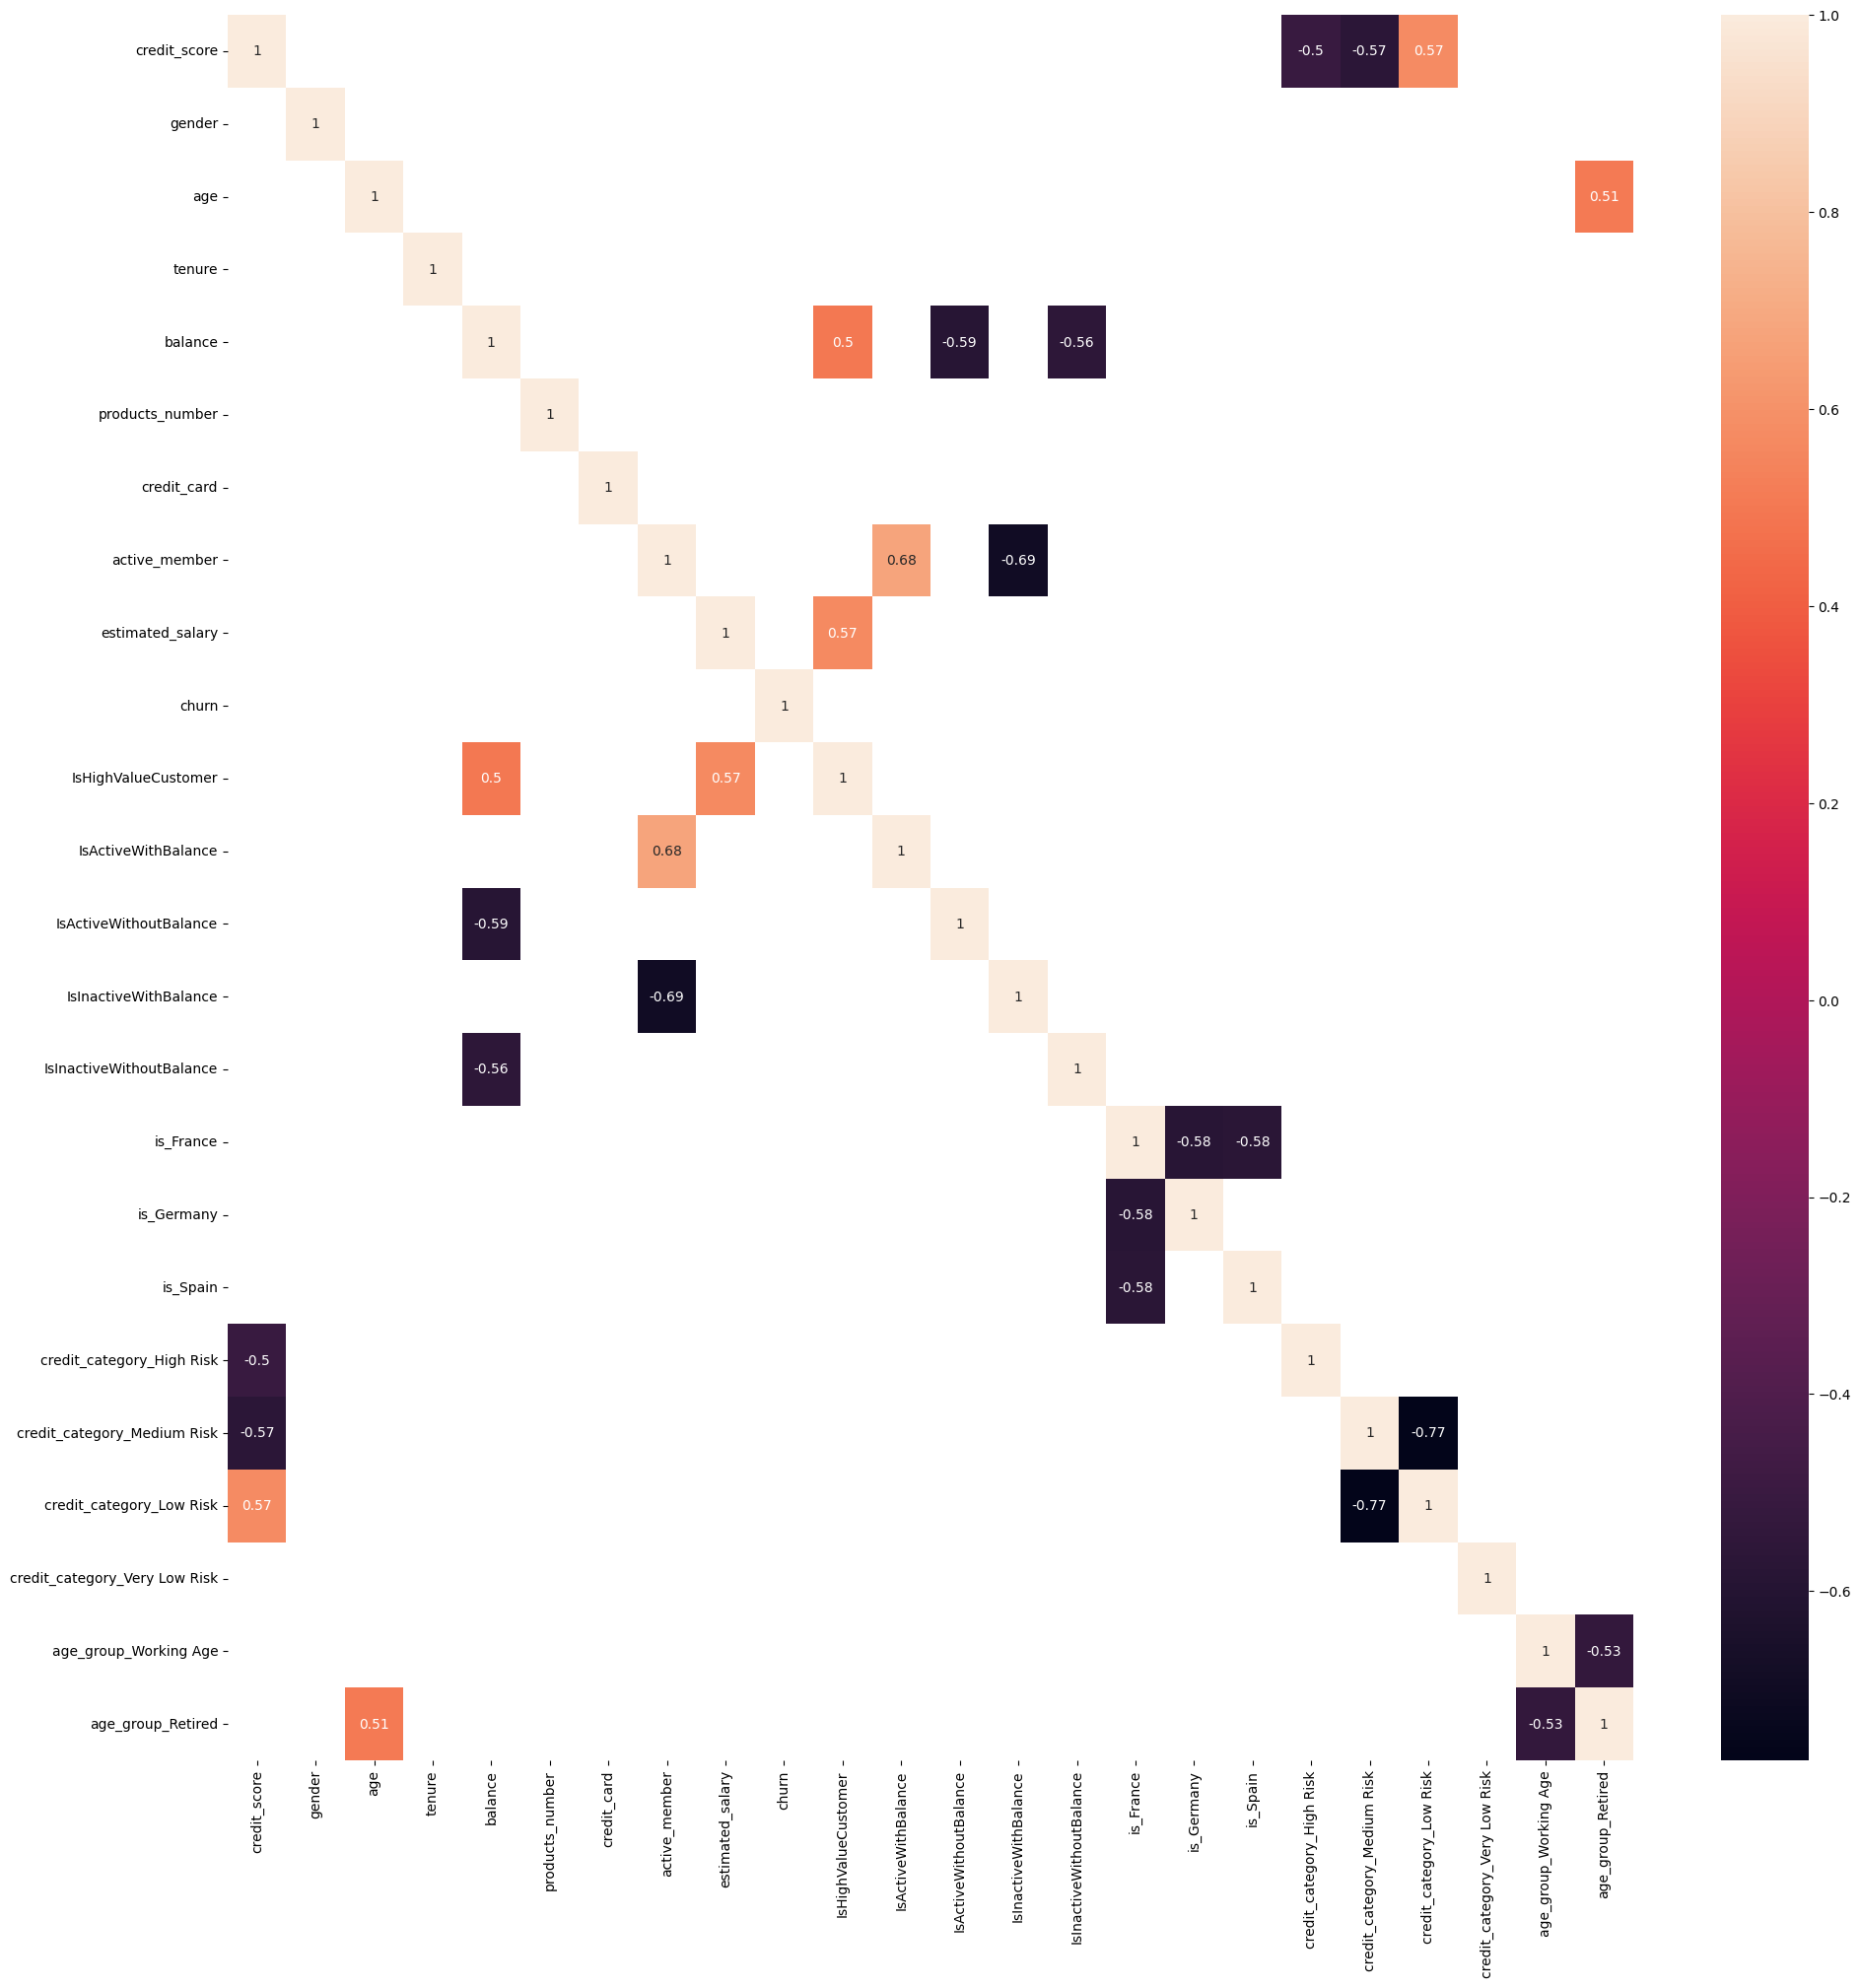

In [142]:
f_corr = df.corr()[(df.corr() >= .5) | (df.corr() <= -.5)]
plt.figure(figsize=(23,23))
sns.heatmap(f_corr,annot=True)
plt.show()

In [143]:
important_features = df[[
    "age",
    "IsHighValueCustomer",
    "is_Germany",
    "is_France",
    "is_Spain",
    "balance",
    "IsInactiveWithBalance",
    "estimated_salary",
    "credit_score",
    "products_number",
    "churn"
]]


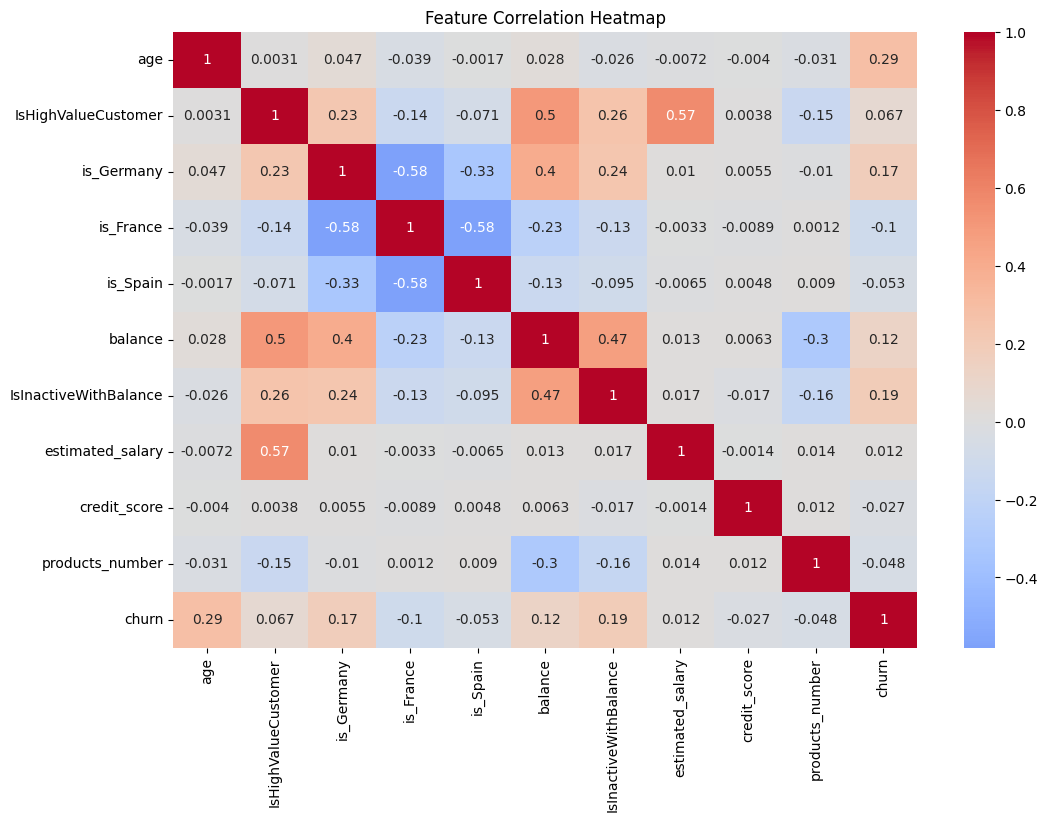

In [146]:
plt.figure(figsize=(12, 8))
sns.heatmap(important_features.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

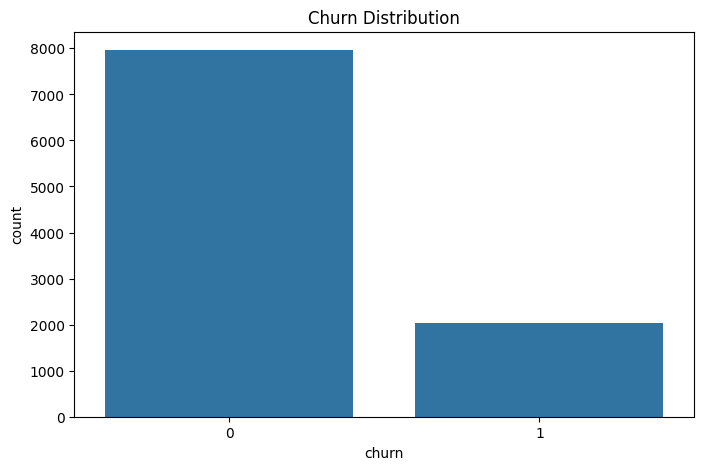

Churn rate: 20.4%


In [152]:
plt.figure(figsize=(8, 5))
sns.countplot(data=important_features, x='churn')
plt.title('Churn Distribution')
plt.show()

print(f"Churn rate: {(important_features['churn'].mean()*100):.1f}%")

In [147]:
df.tail(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,...,IsInactiveWithoutBalance,is_France,is_Germany,is_Spain,credit_category_High Risk,credit_category_Medium Risk,credit_category_Low Risk,credit_category_Very Low Risk,age_group_Working Age,age_group_Retired
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,...,0,0,1,0,0,0,1,0,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,...,0,1,0,0,0,0,1,0,1,0


In [148]:
important_features.tail(2)

,age,IsHighValueCustomer,is_Germany,is_France,is_Spain,balance,IsInactiveWithBalance,estimated_salary,credit_score,products_number,churn
9998,42,0,1,0,0,75075.31,1,92888.52,772,2,1
9999,28,0,0,1,0,130142.79,1,38190.78,792,1,0


In [149]:
churn_rate = important_features['churn'].value_counts(normalize=True)
print(f"Class distribution:\n{churn_rate}")

Class distribution:
churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


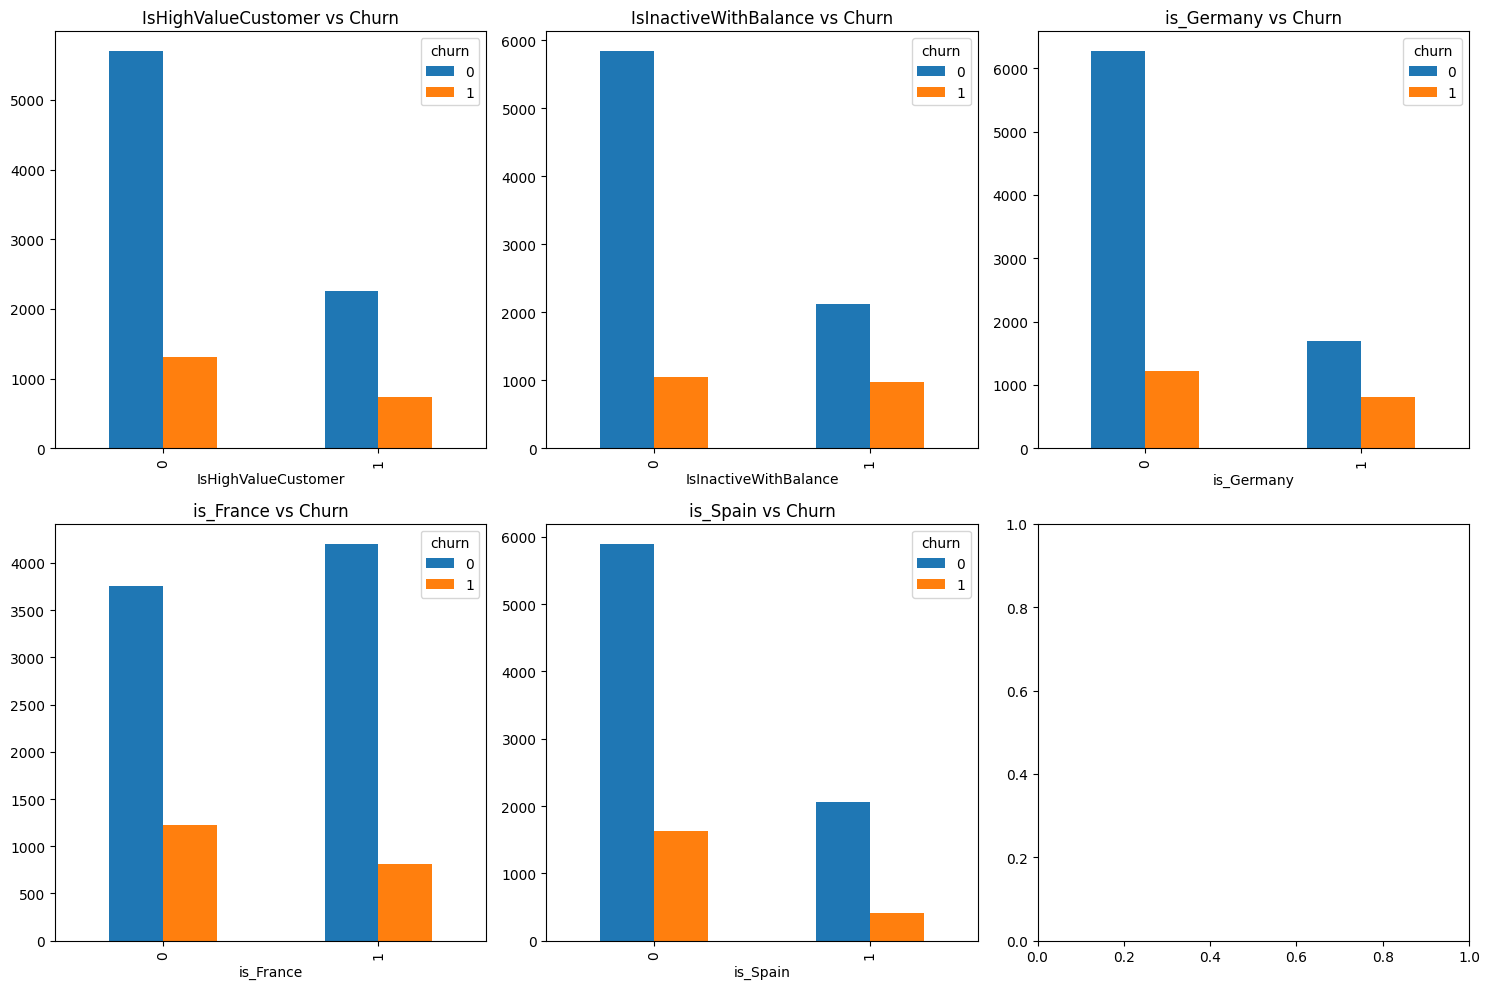

In [150]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
categorical_features = ['IsHighValueCustomer', 'IsInactiveWithBalance', 'is_Germany', 'is_France', 'is_Spain']

for i, feature in enumerate(categorical_features):
    pd.crosstab(important_features[feature], important_features['churn']).plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()

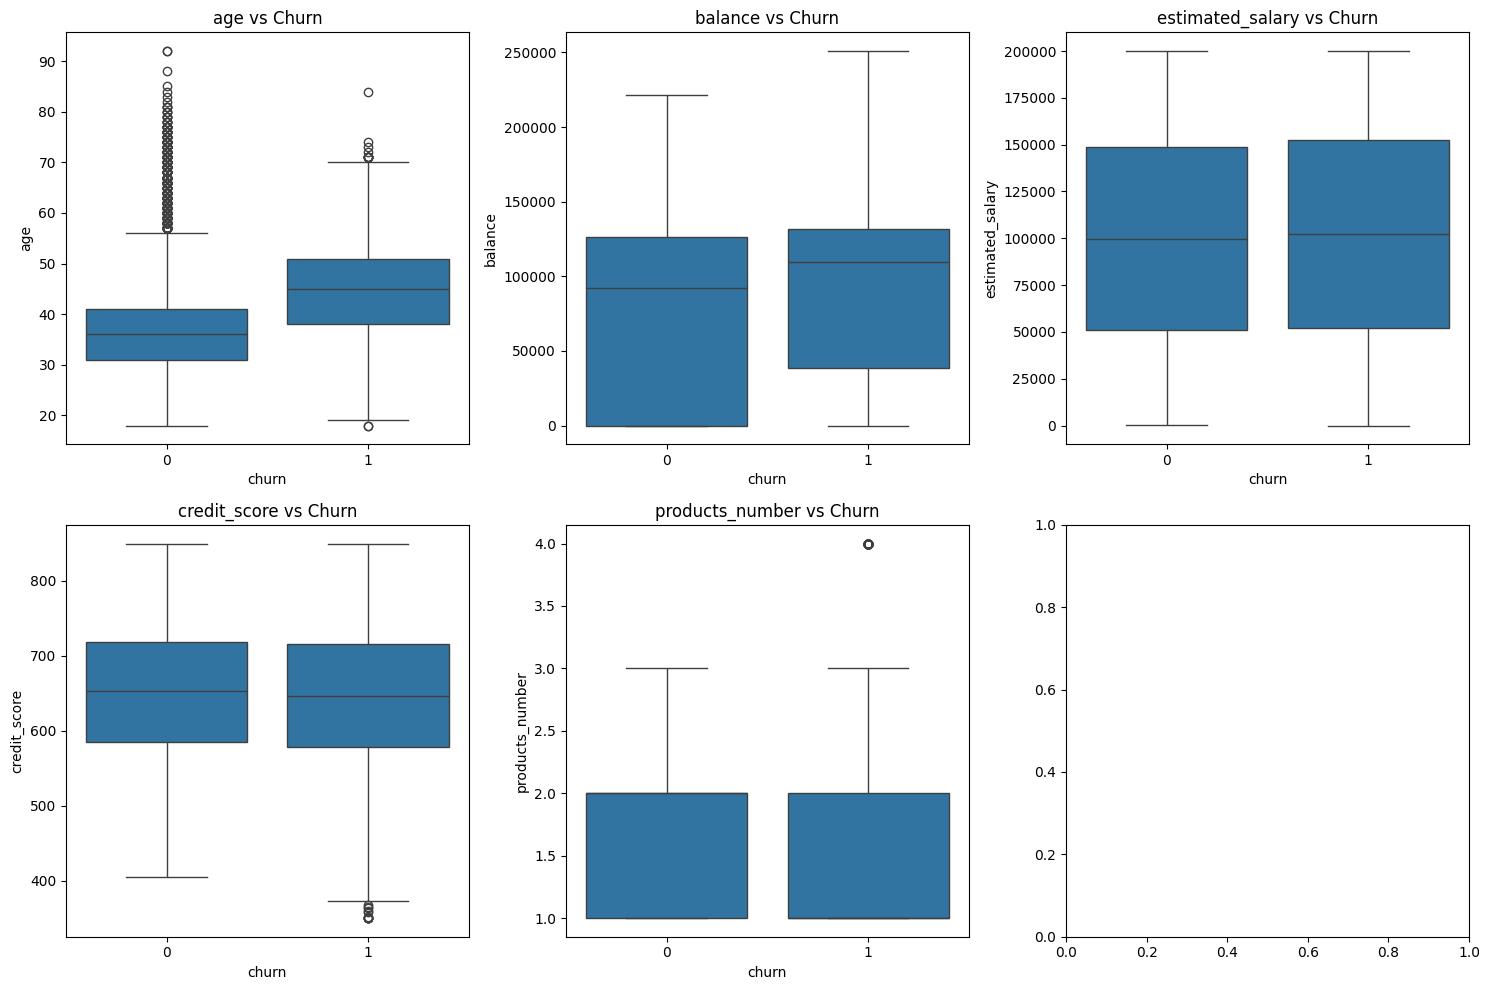

In [151]:
# For continuous features vs churn
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
continuous_features = ['age', 'balance', 'estimated_salary', 'credit_score', 'products_number']

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=important_features, x='churn', y=feature, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs Churn')

plt.tight_layout()
plt.show()